### Pandas로 시각화
Pandas에서 시리즈, 데이터프레임 객체를 사용하여 간단한 시각화가 가능하다.

pandas는 back-end로 matplotlib를 사용하여 시각화 기능을 제공한다.

참고) https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-directly-with-matplotlib 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Data Loading
iris = pd.read_csv("./data/iris.csv")
tips = pd.read_csv("./data/tips.csv", 
                   dtype={'sex':'category','smoker':'category','day':'category', 'time':'category'})

## Basic plotting: plot

pandas의 plot 메소드는 Series, Dataframe에서 사용할 수 있다.  
plot 메소드는 matplotlib의 plt.plot() 메소드를 사용한다.

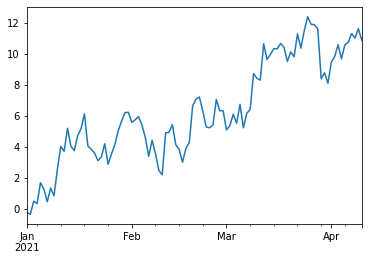

In [3]:
ts = pd.Series(np.random.randn(100), index=pd.date_range("1/1/2021", periods=100))
ts = ts.cumsum()
ts.plot();

## 여러가지 plot 
plot()메소드에서 kind keyword argument를 사용하면 다양한 차트를 그릴 수 있다.

- `bar` or `barh` for bar plots
- `hist` for histogram
- `box` for boxplot
- `kde` or `density` for density plots
- `area` for area plots
- `scatter` for scatter plots
- `hexbin` for hexagonal bin plots
- `pie` for pie plots

kind 키워드 인수를 제공하는 대신 DataFrame.plot.<kind> 메서드를 사용하여 이러한 다른 플롯을 만들 수도 있다.

* df.plot.area     
* df.plot.barh 
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie
* df.hist
* df.boxplot

plot() 그릴때 by 옵션을 사용하여 그래프를 나누어 생성할 수 있다.

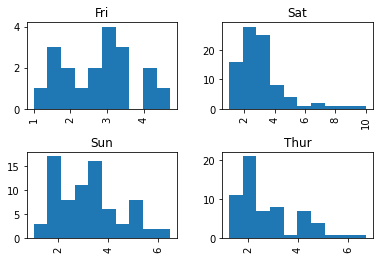

In [4]:
tips.tip.hist(by=tips.day)
plt.show()

plot 메소드에서 table 옵션을 사용하면 데이터프레임을 표 형태로 같이 시각화 할 수 있다.

In [5]:
tips.day = tips.day.cat.set_categories(['Thur','Fri','Sat','Sun'])

In [6]:
df = pd.pivot_table(tips, index='day',columns='sex', values='tip')

<AxesSubplot:xlabel='day'>

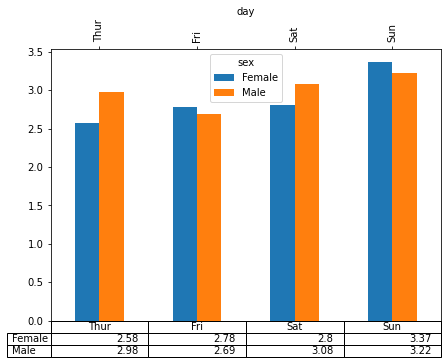

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()  # Display x-axis ticks on top.

df.plot(kind='bar',table=np.round(df.T, 2), ax = ax)

## Table Visualization
표 형식 데이터를 시각화하는 방법이다.

### Styler Functions
- .applymap() (elementwise) : 각 요소에 대해서 함수를 attribute-value 쌍으로 적용한다.
- .apply() (column-/row-/table-wise) : 행, 열, 또는 테이블 단위로 함수를 적용한다.

In [8]:
np.random.seed(0)
df2 = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])
df2

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [9]:
# 음수를 적색으로 표시한다.
def style_negative(v, props=''):
    return props if v < 0 else None
df2.style.applymap(style_negative, props='color:red;')

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [10]:
# 각 열에서 최대값을 하이라이트 한다.
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

df2.style.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


### Builtin Styles

자주 사용하는 몇가지 styler를 built-in으로 지정되어 있다.  
https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Builtin-Styles

In [11]:
# Builtin Styles
df2.style.highlight_max(axis=0) # 각 열에서 최대값을 하이라이트한다.

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


### backgroud gradient

표의 셀 바탕색을 변경하여 색깔에 따른 heatmap을 생성할 수 있다.
seaborn의 colormap을 사용할 수 있다.

In [12]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

df2.style.background_gradient(cmap=cm)

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


### bar chart
데이터프레임 내에 막대그래프를 포함하여 그릴수 있다.

In [13]:
df2.style.bar(subset=['A', 'B'], align='mid', color=['#d65f5f', '#5fba7d'])

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303
